# UYG332 Image Processing Final Project
Prepared by: ERDEM BAKIRCI - B2180.060051

## Problem 1 – tf2_engineer.jpg

### Açıklama
Bu hücredeki kod, belirli bir görüntü işleme adımını gerçekleştirmektedir. Detaylı açıklama daha sonra düzenlenebilir.


### Problem 1 – Adding a Color Patch to the Image Center
This cell performs basic image reading and manipulation using OpenCV and matplotlib. The image is first loaded and converted from BGR to RGB color format for proper visualization with matplotlib. The code calculates the center coordinates of the image and then overlays a rectangular colored patch at that location. This demonstrates how to access pixel values, manipulate image regions, and visualize the effect using matplotlib. It also prints the pixel intensity values at the center before and after modification.

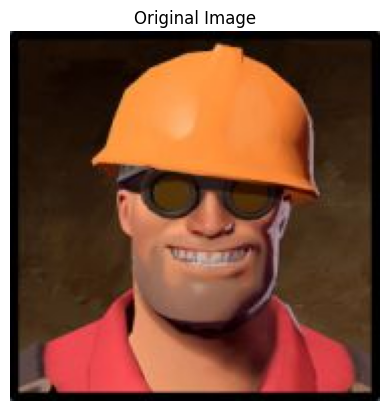

Image center (y, x): (92, 92)
Center intensity value (BGR): [ 67  92 172]
Patch center intensity value (BGR): [ 50 158 168]


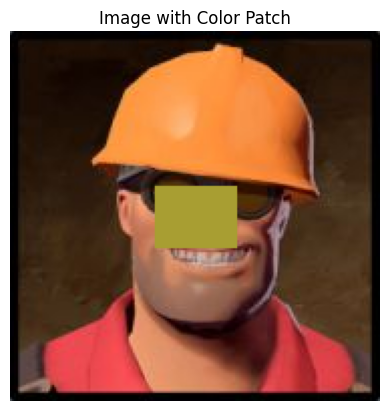

In [5]:

import cv2
import matplotlib.pyplot as plt

img1 = cv2.imread('imagefinal/tf2_engineer.jpg')
img1_rgb = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
plt.imshow(img1_rgb)
plt.title("Original Image")
plt.axis("off")
plt.show()

yc, xc = img1.shape[0] // 2, img1.shape[1] // 2
print("Image center (y, x):", (yc, xc))
print("Center intensity value (BGR):", img1[yc, xc])

cv2.rectangle(img1, (xc - 20, yc - 15), (xc + 20, yc + 15), (0x32, 0x9e, 0xa8), -1)
print("Patch center intensity value (BGR):", img1[yc, xc])
plt.imshow(cv2.cvtColor(img1, cv2.COLOR_BGR2RGB))
plt.title("Image with Color Patch")
plt.axis("off")
plt.show()


## Problem 2 – einstein.tif

### Açıklama
Bu hücredeki kod, belirli bir görüntü işleme adımını gerçekleştirmektedir. Detaylı açıklama daha sonra düzenlenebilir.


### Problem 2 – Negative Image and Pixel Comparison
This cell demonstrates how to create a negative of a grayscale image. The negative image is computed by subtracting each pixel value from 255, which inverts the intensity values. This technique is commonly used in image enhancement to emphasize features. The original and negative images are both displayed. In addition, five random pixels are sampled and their original vs. negative intensity values are printed, showcasing how pixel-level operations can be verified manually.

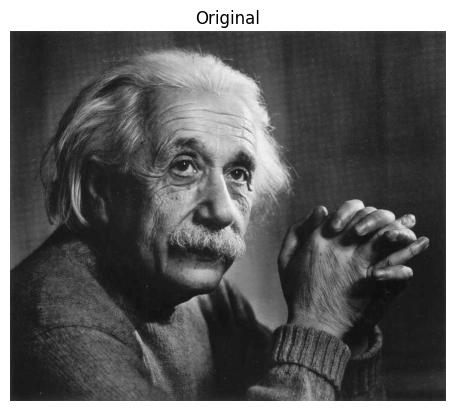

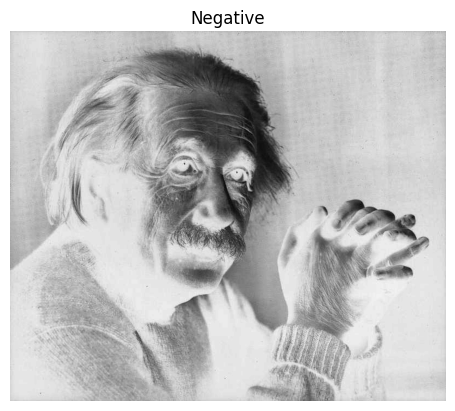

Pixel (455,634) → Original: 116 | Negative: 139
Pixel (555,81) → Original: 108 | Negative: 147
Pixel (673,662) → Original: 104 | Negative: 151
Pixel (438,154) → Original: 100 | Negative: 155
Pixel (519,276) → Original: 96 | Negative: 159


In [6]:

img2 = cv2.imread('imagefinal/einstein.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img2, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

img2_neg = 255 - img2
plt.imshow(img2_neg, cmap='gray')
plt.title("Negative")
plt.axis("off")
plt.show()

import numpy as np
h, w = img2.shape
for _ in range(5):
    y, x = np.random.randint(0, h), np.random.randint(0, w)
    print(f"Pixel ({y},{x}) → Original: {img2[y,x]} | Negative: {img2_neg[y,x]}")


## Problem 3 – pout.tif

### Açıklama
Bu hücredeki kod, belirli bir görüntü işleme adımını gerçekleştirmektedir. Detaylı açıklama daha sonra düzenlenebilir.


### Problem 3 – Log Transform and Its Inverse
In this cell, logarithmic transformation is applied to enhance details in darker regions of a grayscale image. The transformation compresses high pixel values and expands low ones, improving contrast in shadowy areas. The log-transformed image is then displayed. Two inverse-log operations are also performed: one on the original image and one on the log-transformed image. This demonstrates how information can be compressed and partially recovered using logarithmic functions.

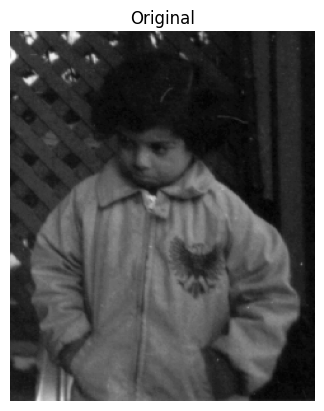

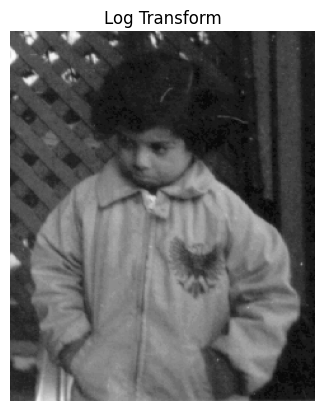

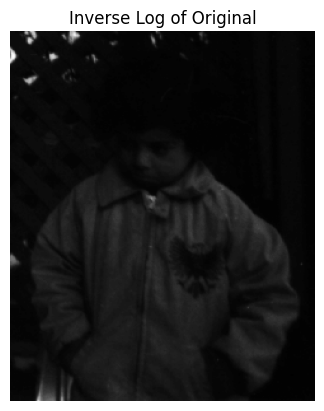

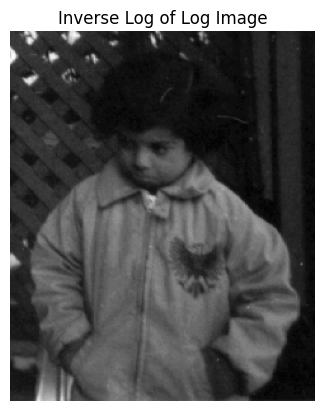

In [7]:

img3 = cv2.imread('imagefinal/pout.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img3, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

img3_log = (np.log1p(img3.astype(np.float32)) * 255 / np.log(256)).astype(np.uint8)
plt.imshow(img3_log, cmap='gray')
plt.title("Log Transform")
plt.axis("off")
plt.show()

img3_ilog = ((np.exp(img3 / 255 * np.log(256)) - 1)).astype(np.uint8)
plt.imshow(img3_ilog, cmap='gray')
plt.title("Inverse Log of Original")
plt.axis("off")
plt.show()

img3_ilog_log = ((np.exp(img3_log / 255 * np.log(256)) - 1)).astype(np.uint8)
plt.imshow(img3_ilog_log, cmap='gray')
plt.title("Inverse Log of Log Image")
plt.axis("off")
plt.show()


## Problem 4 – moon.tif

### Açıklama
Bu hücredeki kod, belirli bir görüntü işleme adımını gerçekleştirmektedir. Detaylı açıklama daha sonra düzenlenebilir.


### Problem 4 – Image Sharpening with Unsharp Masking
This section enhances image sharpness using unsharp masking in both spatial and frequency domains. In the spatial domain, a Gaussian-blurred version of the image is subtracted from the original to create a high-frequency mask, which is then added back with a scaling factor (k). In the frequency domain, a high-boost filter is applied to the Fourier transform of the image to achieve similar sharpening. The code compares the results visually for different values of k.

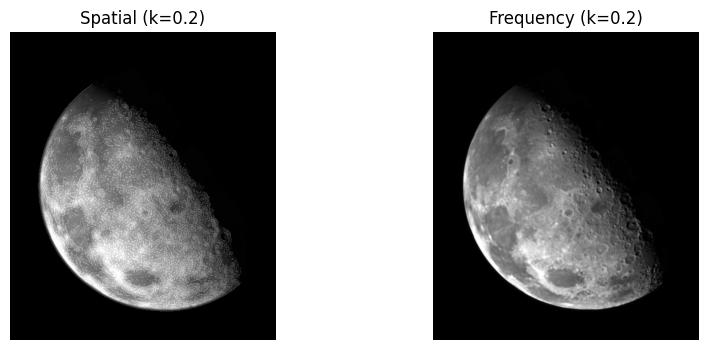

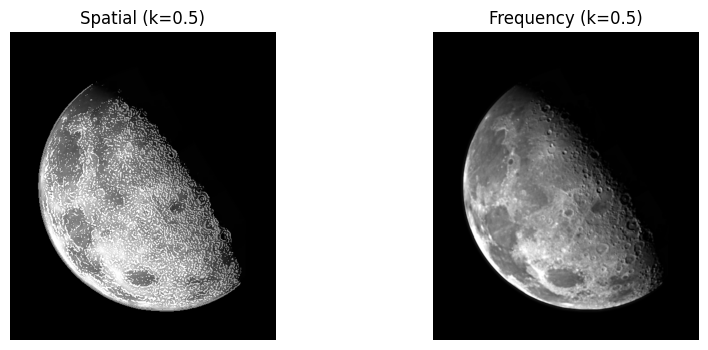

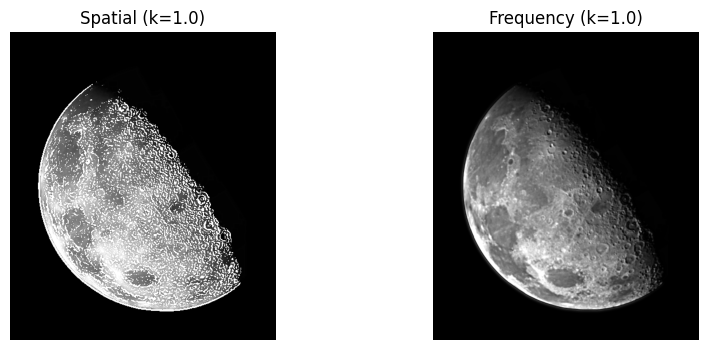

In [8]:

from scipy.ndimage import gaussian_filter
from numpy.fft import fft2, ifft2, fftshift

img4 = cv2.imread('imagefinal/moon.tif', cv2.IMREAD_GRAYSCALE)

def unsharp_spatial(img, k):
    blur = gaussian_filter(img, sigma=1)
    mask = img - blur
    return np.clip(img + k * mask, 0, 255).astype(np.uint8)

def unsharp_freq(img, k, D0=30):
    f = fft2(img)
    fshift = fftshift(f)
    M, N = img.shape
    u = np.arange(M) - M//2
    v = np.arange(N) - N//2
    V, U = np.meshgrid(v, u)
    D = np.sqrt(U**2 + V**2)
    H = 1 + k * (1 - np.exp(-(D**2) / (2 * (D0**2))))
    G = H * fshift
    return np.clip(np.abs(ifft2(np.fft.ifftshift(G))), 0, 255).astype(np.uint8)

for k in [0.2, 0.5, 1.0]:
    spatial = unsharp_spatial(img4, k)
    freq = unsharp_freq(img4, k)
    fig, axs = plt.subplots(1, 2, figsize=(10, 4))
    axs[0].imshow(spatial, cmap='gray')
    axs[0].set_title(f"Spatial (k={k})")
    axs[0].axis("off")
    axs[1].imshow(freq, cmap='gray')
    axs[1].set_title(f"Frequency (k={k})")
    axs[1].axis("off")
    plt.show()


## Problem 5 – pcb.tif

### Açıklama
Bu hücredeki kod, belirli bir görüntü işleme adımını gerçekleştirmektedir. Detaylı açıklama daha sonra düzenlenebilir.


### Problem 5 – Noise Reduction with Median Filtering
This cell focuses on noise removal from a grayscale image, specifically targeting salt-and-pepper noise. The original image and its histogram are displayed first. Then, a median filter with a kernel size of 3 is applied using OpenCV’s `medianBlur` function. Median filtering is effective for removing outliers while preserving edges, making it suitable for this kind of image preprocessing.

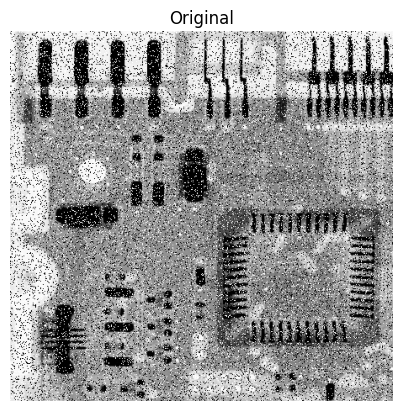

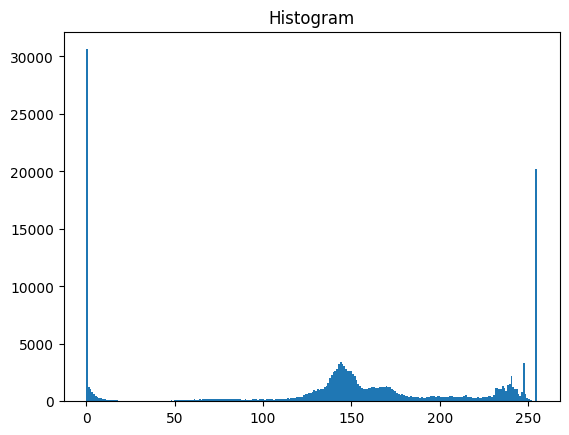

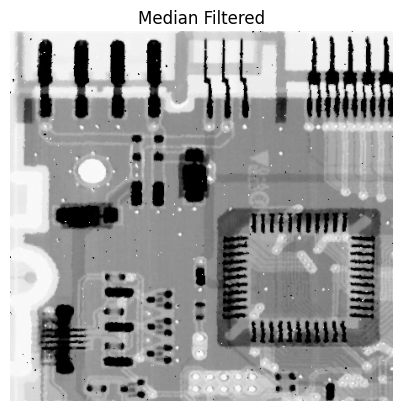

In [9]:

img5 = cv2.imread('imagefinal/pcb.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img5, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

plt.hist(img5.ravel(), bins=256)
plt.title("Histogram")
plt.show()

denoised = cv2.medianBlur(img5, 3)
plt.imshow(denoised, cmap='gray')
plt.title("Median Filtered")
plt.axis("off")
plt.show()


## Problem 6 – pollen.tif

### Açıklama
Bu hücredeki kod, belirli bir görüntü işleme adımını gerçekleştirmektedir. Detaylı açıklama daha sonra düzenlenebilir.


### Problem 6 – Histogram Equalization and CLAHE
This part improves image contrast using two histogram equalization techniques. First, global histogram equalization is applied using OpenCV's `equalizeHist` function. Then, Contrast Limited Adaptive Histogram Equalization (CLAHE) is used, which applies local equalization over small tiles of the image. CLAHE prevents over-amplification of noise and is especially useful for enhancing local contrast in medical or low-light images. Both results are visualized for comparison.

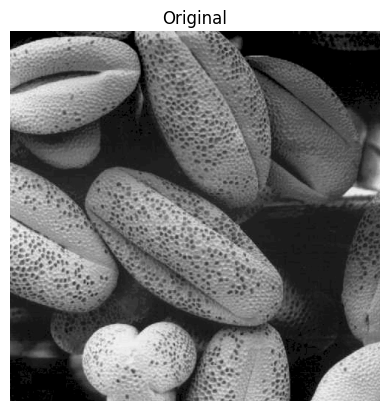

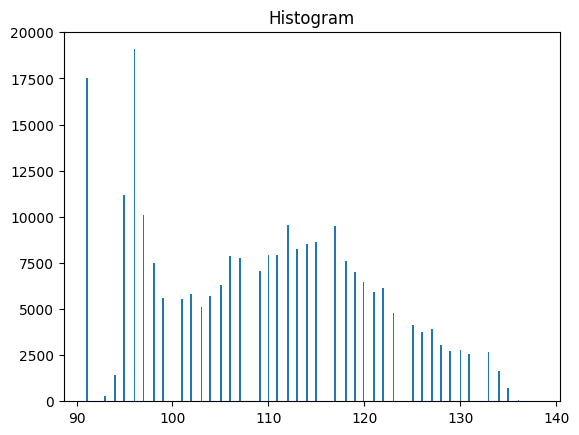

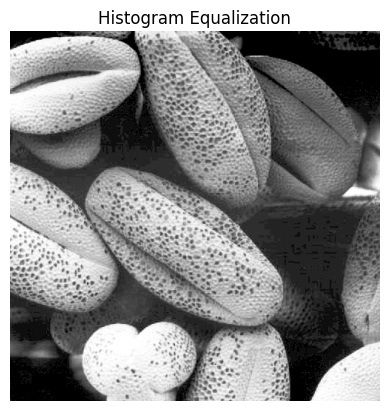

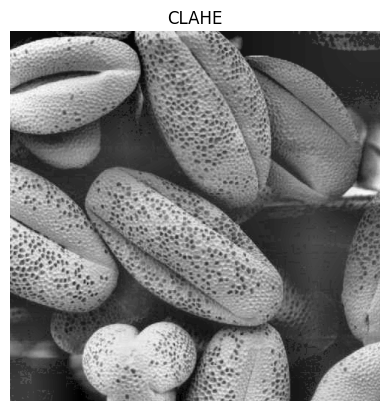

In [10]:

img6 = cv2.imread('imagefinal/pollen.tif', cv2.IMREAD_GRAYSCALE)
plt.imshow(img6, cmap='gray')
plt.title("Original")
plt.axis("off")
plt.show()

plt.hist(img6.ravel(), bins=256)
plt.title("Histogram")
plt.show()

eq1 = cv2.equalizeHist(img6)
plt.imshow(eq1, cmap='gray')
plt.title("Histogram Equalization")
plt.axis("off")
plt.show()

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
eq2 = clahe.apply(img6)
plt.imshow(eq2, cmap='gray')
plt.title("CLAHE")
plt.axis("off")
plt.show()
